In [ ]:
!pip install imblearn
!pip install --upgrade scikit-learn==0.22
!pip install -U nltk

Requirement already up-to-date: scikit-learn==0.22 in /usr/local/lib/python3.7/dist-packages (0.22)
Requirement already up-to-date: nltk in /usr/local/lib/python3.7/dist-packages (3.6.2)


# **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Load Dataset
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/DatafinitiElectronics.xlsx')
data = data.loc[:, ~data.columns.str.contains("^Unnamed")] #Remove unnammed column
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,reviews.rating,reviews.text
0,5.0,"This keyboard is very easy to type on, but the..."
1,4.0,It's thin and light. I can type pretty easily ...
2,4.0,I love the new design the keys are spaced well...
3,5.0,Attached easily and firmly. Has a nice feel. A...
4,5.0,"Our original keyboard was okay, but did not ha..."
5,5.0,purchased to replace original surface pro 3 ke...
6,4.0,I find it very comfortable to type with it but...
7,3.0,Good Keyboard and addition to the Surface Pro ...
8,4.0,"tough getting it to work on surface pro 3, but..."
9,5.0,I can now quickly and hassle free log into my ...


In [ ]:
data = data.dropna()

In [ ]:
datar.to_excel("/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/DatafinitiElectronics.xlsx",index = False)

# **Data Visualization**

KeyError: ignored

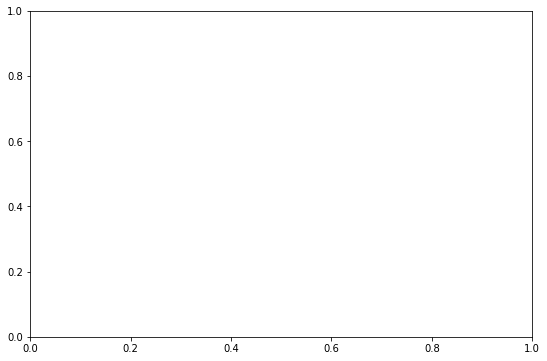

In [ ]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
x = x = ['Negative', 'Positive', 'Neutral', 'Slightly Positive', 'Slightly Negative']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(data[data['Class']== 0]), len(data[data['Class']== 1]), len(data[data['Class']== 5]),len(data[data['Class']== 8]),
     len(data[data['Class']== 9])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()
data["Class"].value_counts()

# **Preprocessing**

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

def stemming(text):
  txt = " ".join([ps.stem(word) for word in text.split()])
  
  return txt

def remove_punc(text):
  txt = re.sub("[^a-zA-Z']",' ',text)
  txt = " ".join(txt.split())  

  return txt
def remove_punc_qut(text):
  txt = re.sub("[']",'',text)
  txt = " ".join(txt.split())  

  return txt

def toLower(text):
  txt = text.lower()

  return txt

def remove_stopword(text):
  #add words that aren't in the NLTK stopwords list
  new_stopwords = ['no', 'yeah', 'xiaomi', 'youtube']
  new_stopwords_list = stop_words.union(new_stopwords)

  #remove words that are in NLTK stopwords list
  not_stopwords = {"no", "not", "none", "no one", "nobody", "nothing", "neither", "nowhere", "never", "hardly", "scarcely"
                   "barely", "doesn't", "does not", "isn't", "is not", "was not", "wasn't", "shouldn't","should not", "wouldn't",
                   "would not", "couldn't","could not","can not" "Can't", "don't", "won't"} 
  final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])
  
  txt = " ".join(w for w in text.split() if w not in final_stop_words) 

  return txt


def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = " ".join(text.split())
  text = remove_stopword(text)
  text= remove_punc_qut(text)
  text = " ".join(text.split()) 
  text = stemming(text)
  
  return text

data['Reviews'] = data['reviews.text'].apply(preprocessing)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews.rating,reviews.text,Reviews
0,5.0,"This keyboard is very easy to type on, but the...",keyboard easi type fingerprint reader best fea...
1,4.0,It's thin and light. I can type pretty easily ...,thin light type pretti easili
2,4.0,I love the new design the keys are spaced well...,love new design key space well no mi type fing...
3,5.0,Attached easily and firmly. Has a nice feel. A...,attach easili firmli nice feel must surfac pro
4,5.0,"Our original keyboard was okay, but did not ha...",origin keyboard okay not laptop feel bit flopp...
...,...,...,...
7294,4.0,This remote was a decent replacement for my lo...,remot decent replac logitech die mani year use...
7295,4.0,This looks good on my celling. Flushes very we...,look good cell flush well cell
7296,4.0,"Great Plate for projector mount, very easy to ...",great plate projector mount easi instal
7297,5.0,This mount worked very well for me when I used...,mount work well use peerless adjust column con...


In [ ]:
#check frequency
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()
freq

great       2834
use         2830
remot       2659
sound       2589
not         2435
            ... 
priot          1
noctua         1
charat         1
megeboom       1
ny             1
Length: 7064, dtype: int64

# **Over Sampling**

In [ ]:
#Remove unncessary columns
dataf = data.drop('reviews.text', axis = 1)
dataf

,reviews.rating,Reviews
0,5.0,keyboard easi type fingerprint reader best fea...
1,4.0,thin light type pretti easili
2,4.0,love new design key space well no mi type fing...
3,5.0,attach easili firmli nice feel must surfac pro
4,5.0,origin keyboard okay not laptop feel bit flopp...
...,...,...
7294,4.0,remot decent replac logitech die mani year use...
7295,4.0,look good cell flush well cell
7296,4.0,great plate projector mount easi instal
7297,5.0,mount work well use peerless adjust column con...


In [ ]:
from imblearn import over_sampling
from collections import Counter

dataf = data.drop('reviews.text', axis = 1) #remove unncessary columns
X = dataf.drop('reviews.rating', axis=1)
Y = dataf['reviews.rating']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape) 

[(1.0, 4490), (2.0, 4490), (3.0, 4490), (4.0, 4490), (5.0, 4490)] (22450,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_resampled.shape

(22450,)

In [ ]:
#storing in dataframe
resampled_data = pd.DataFrame(X_resampled, columns=['Reviews'])
resampled_data['Class'] = y_resampled
resampled_data

,Reviews,Class
0,keyboard easi type fingerprint reader best fea...,5.0
1,thin light type pretti easili,4.0
2,love new design key space well no mi type fing...,4.0
3,attach easili firmli nice feel must surfac pro,5.0
4,origin keyboard okay not laptop feel bit flopp...,5.0
...,...,...
22445,keyboard great feel elev key drawback far fing...,4.0
22446,surfac pro purchas keyboard touch id hello fea...,4.0
22447,case lightweight bit get job done good shock a...,4.0
22448,up down instal physic easi enough show bio not...,4.0


# **Data Visualization**

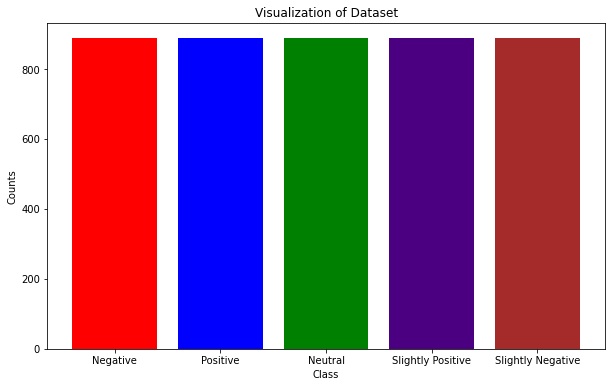

In [ ]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
x = ['Negative', 'Positive', 'Neutral', 'Slightly Positive', 'Slightly Negative']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(resampled_data[resampled_data['Class']== 0]), len(resampled_data[resampled_data['Class']== 1]), 
     len(resampled_data[resampled_data['Class']== 5]),len(resampled_data[resampled_data['Class']== 8]),
     len(resampled_data[resampled_data['Class']== 9])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()

In [ ]:
print(X_resampled[:50])
print(y_resampled[:50])

[['though price much higher product qualiti satisfi happi']
 ['honest well satisfi thank daraz seller']
 ['good bought pair use month']
 ['qualiti good']
 ['wrong product']
 ['good product satisfi']
 ['fake product poor qualiti']
 ['order not']
 ['good product']
 ['good price made gamer love']
 ['first impress good deleveri late']
 ['good product']
 ['nice product work good thank seller daraz give good product thank time time deliveri']
 ['wow fast deliveri good']
 ['good product accord price']
 ['nice product recmmend']
 ['good product recommend']
 ['good product satisfi']
 ['nice product']
 ['good product price']
 ['tnx origin product']
 ['good product']
 ['product good']
 ['qualiti good']
 ['sound qualiti good']
 ['review use day seller satisfi sound good comfort enough daraz good servic deliveri hour']
 ['profect ossam love headphon']
 ['product good sound qualiti averag']
 ['receiv headphon']
 ['sound qualiti good bt color differ']
 ['sound qualiti awsom']
 ['nice product']
 ['hea

# **Feature Extraction**

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split())

tfidf_vect = tfidf.fit_transform(resampled_data['Reviews'])

dftf = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())
#dftf

#tfidf.get_feature_names()

In [ ]:
#BagofWOrds
from sklearn.feature_extraction.text import CountVectorizer
cVect = CountVectorizer()
count_vect = cVect.fit_transform(resampled_data['Reviews'])

dfcv = pd.DataFrame(count_vect.toarray(), columns=cVect.get_feature_names())
dfcv

#cVect.get_feature_names()

,ab,abl,abnorm,absolut,accept,accid,accord,accordingli,account,accur,action,activ,actual,ad,adapt,add,address,adequ,adjust,advanc,advantag,advertis,advic,advis,afford,affort,africa,aftermarket,ago,aid,air,airflow,airpod,al,alamin,alert,alhamduillah,alhamduilllah,alhamdulillah,allah,...,wil,will,willingli,wind,window,wire,wiresto,wise,wish,wit,within,withn,without,wonder,wont,wood,woow,word,work,worri,wors,worst,worth,worthi,worthle,would,wouldnt,wow,woww,wrap,wreck,write,wrong,wronhg,xundd,ye,year,yesterday,yet,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
label = resampled_data["Class"].values
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, label, test_size = 0.2, random_state = 4, stratify = label)
resampled_data["Class"].unique()

array([5., 4., 3., 2., 1.])

Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
skfold=StratifiedKFold(n_splits=10)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

kfold_validation=KFold(n_splits=10, shuffle=True)

# **MNB Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(x_train,y_train)
y_pred_mnb = mnb_model.predict(x_test)
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

         1.0       0.88      0.94      0.91       898
         2.0       0.80      0.91      0.85       898
         3.0       0.79      0.83      0.81       898
         4.0       0.64      0.57      0.60       898
         5.0       0.71      0.61      0.66       898

    accuracy                           0.77      4490
   macro avg       0.76      0.77      0.77      4490
weighted avg       0.76      0.77      0.77      4490



Confusion Matrix

Confusion matrix, without normalization for Multinomial NB
[[141   0   7  21   8]
 [  2 138   9   8  21]
 [ 12   3 158   2   3]
 [  4   5   3 138  27]
 [  6   8   4  27 133]]


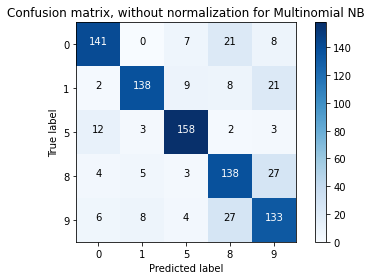

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Multinomial NB")
    else:
        print('Confusion matrix, without normalization for Multinomial NB')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_mnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for Multinomial NB')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/MNB COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.9575295392926015 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


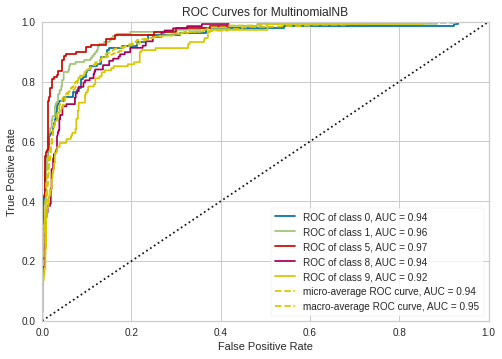

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_mnd_prob = mnb_model.predict_proba(x_test)
mnb = roc_auc_score(y_test, y_pred_mnd_prob, multi_class="ovo")
print("Roc_AUC Score: ", mnb, "\n")

# Instantiate the visualizer with the classification model
roc_auc(mnb_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Using cross validation

In [ ]:
gnb_model = MultinomialNB()
results=cross_val_score(mnb_model,tfidf_vect,label,cv=kfold_validation, scoring = 'accuracy')
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.76 0.76 0.84 0.75 0.76 0.81 0.77 0.72 0.76 0.75] 

Accuracy: 0.77 (0.03)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

lgc_model = LogisticRegression(multi_class="multinomial")
#ovr = OneVsRestClassifier(lgc_model)
lgc_model = lgc_model.fit(x_train,y_train)
y_pred_lgc = lgc_model.predict(x_test)
print(classification_report(y_test,y_pred_lgc))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       898
         2.0       0.94      1.00      0.97       898
         3.0       0.88      0.95      0.91       898
         4.0       0.74      0.68      0.71       898
         5.0       0.75      0.69      0.72       898

    accuracy                           0.86      4490
   macro avg       0.85      0.86      0.86      4490
weighted avg       0.85      0.86      0.86      4490



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix

Confusion matrix, without normalization for Logistic Regression
[[153   0   4  16   4]
 [  2 152   7   3  14]
 [ 10   2 164   0   2]
 [  5   3   2 145  22]
 [  6   6   4  21 141]]


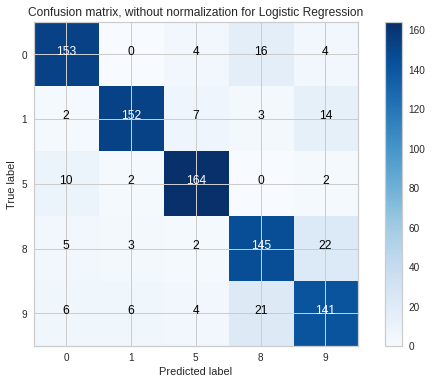

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Logistic Regression")
    else:
        print('Confusion matrix, without normalization for Logistic Regression')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_lgc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for Logistic Regression')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/LGC COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.9708711701147236 



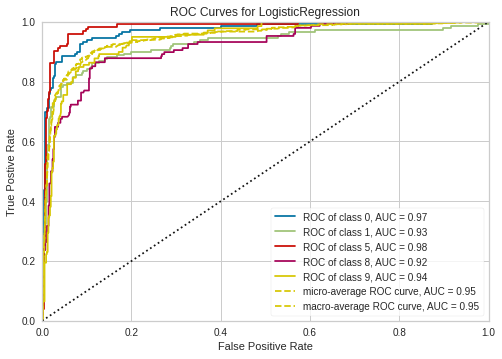

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_lgc_prob = lgc_model.predict_proba(x_test)
lgc = roc_auc_score(y_test, y_pred_lgc_prob, multi_class="ovo")
print("Roc_AUC Score: ", lgc, "\n")

# Instantiate the visualizer with the classification model
roc_auc(lgc_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Cross Validation

In [ ]:
lgc_model = LogisticRegression()
results=cross_val_score(lgc_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

[0.85 0.79 0.8  0.82 0.83 0.86 0.85 0.86 0.83 0.79] 

Accuracy: 0.83 (0.03)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svmModel = SVC(kernel = 'rbf', probability=True)
svmModel.fit(x_train,y_train)
y_predSVM = svmModel.predict(x_test)
#print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       898
         2.0       1.00      1.00      1.00       898
         3.0       0.99      1.00      1.00       898
         4.0       0.87      0.87      0.87       898
         5.0       0.87      0.86      0.87       898

    accuracy                           0.95      4490
   macro avg       0.95      0.95      0.95      4490
weighted avg       0.95      0.95      0.95      4490



Confusion Matrix

Confusion matrix, without normalization for SVM
[[170   0   2   5   0]
 [  1 164   2   2   9]
 [  2   1 175   0   0]
 [  0   2   0 164  11]
 [  4   6   0   9 159]]


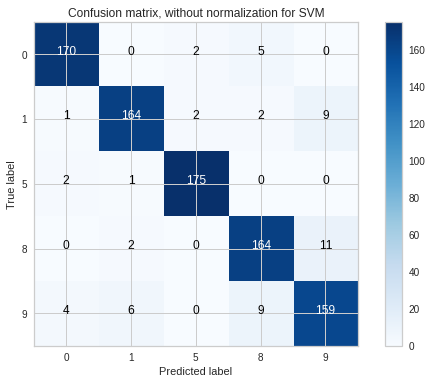

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for SVM')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_predSVM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for SVM')

ROC_AUC

Roc_AUC Score:  0.9877704267764609 



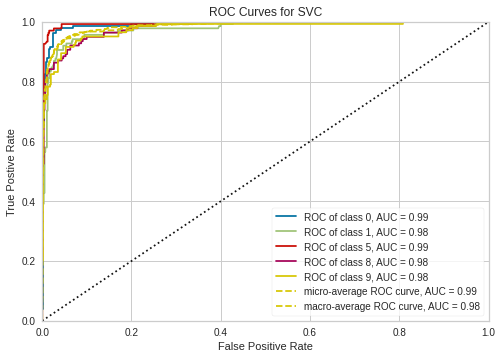

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_svm_prob = svmModel.predict_proba(x_test)
svm = roc_auc_score(y_test, y_pred_svm_prob, multi_class="ovo")
print("Roc_AUC Score: ", svm, "\n")

# Instantiate the visualizer with the classification model
roc_auc(svmModel, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Cross Validation

In [ ]:
results=cross_val_score(svmModel,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.9  0.91 0.91 0.92 0.91 0.89 0.93 0.93 0.93 0.91] 

Accuracy: 0.92 (0.01)


# **Passive Algorithm**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       898
         2.0       0.99      1.00      0.99       898
         3.0       0.95      1.00      0.98       898
         4.0       0.77      0.88      0.82       898
         5.0       0.87      0.68      0.76       898

    accuracy                           0.91      4490
   macro avg       0.91      0.91      0.91      4490
weighted avg       0.91      0.91      0.91      4490



Confusion Matrix

Confusion matrix, without normalization for SVM
[[170   0   2   5   0]
 [  1 164   2   2   9]
 [  2   1 175   0   0]
 [  0   2   0 164  11]
 [  4   6   0   9 159]]


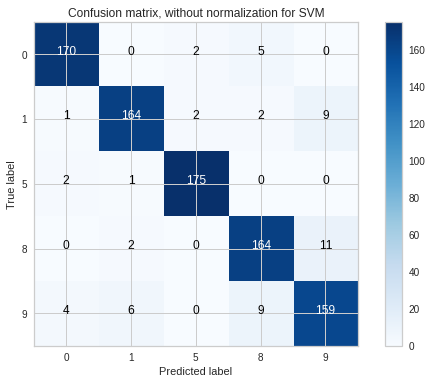

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for SVM')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_predSVM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for SVM')

ROC_AUC

Roc_AUC Score:  PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False) 



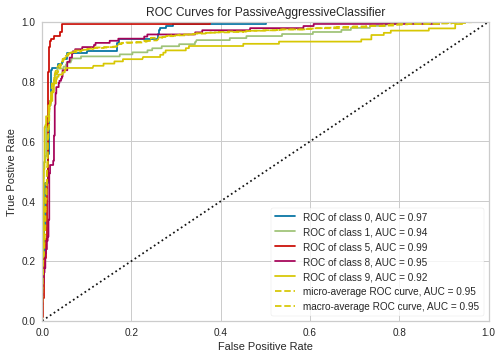

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_svm_prob = svmModel.predict_proba(x_test)
mnb = roc_auc_score(y_test, y_pred_svm_prob, multi_class="ovo")
print("Roc_AUC Score: ", linear_clf, "\n")

# Instantiate the visualizer with the classification model
roc_auc(linear_clf, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Cross Validation

In [ ]:
linear_clf = PassiveAggressiveClassifier()
results=cross_val_score(linear_clf,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.92 0.89 0.89 0.9  0.87 0.91 0.9  0.88 0.9  0.9 ] 

Accuracy: 0.90 (0.01)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model = rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       898
         2.0       1.00      1.00      1.00       898
         3.0       1.00      1.00      1.00       898
         4.0       0.93      0.91      0.92       898
         5.0       0.91      0.93      0.92       898

    accuracy                           0.97      4490
   macro avg       0.97      0.97      0.97      4490
weighted avg       0.97      0.97      0.97      4490



Confusion Matrix

Confusion matrix, without normalization for Random Forest
[[171   0   0   5   1]
 [  2 154   8   5   9]
 [  2   1 175   0   0]
 [  0   0   2 168   7]
 [  3   7   0   7 161]]


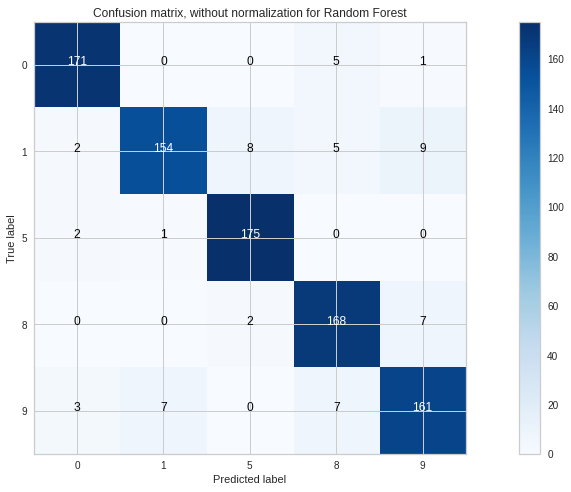

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Random Forest")
    else:
        print('Confusion matrix, without normalization for Random Forest')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,7))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for Random Forest')

ROC_AUC

In [ ]:
"""from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_rf_prob = rf_model.predict_proba(x_test)
rf = roc_auc_score(y_test, y_pred_rf_prob, multi_class="ovo")
print("Roc_AUC Score: ", rf, "\n")

# Instantiate the visualizer with the classification model
roc_auc(model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])"""

'from sklearn.metrics import roc_auc_score, roc_curve\nfrom yellowbrick.classifier.rocauc import roc_auc\nimport matplotlib.pyplot as plt\ny_pred_rf_prob = rf_model.predict_proba(x_test)\nrf = roc_auc_score(y_test, y_pred_rf_prob, multi_class="ovo")\nprint("Roc_AUC Score: ", rf, "\n")\n\n# Instantiate the visualizer with the classification model\nroc_auc(model, x_train, y_train, X_test=x_test, y_test=y_test, classes=[\'0\', \'1\', \'5\', \'8\', \'9\'])'

Cross Validaion

In [ ]:
rf_model = RandomForestClassifier()
results=cross_val_score(rf_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.92 0.93 0.93 0.95 0.95 0.93 0.91 0.94 0.93 0.93] 

Accuracy: 0.93 (0.01)


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       898
         2.0       1.00      1.00      1.00       898
         3.0       0.98      1.00      0.99       898
         4.0       0.95      0.89      0.92       898
         5.0       0.89      0.93      0.91       898

    accuracy                           0.96      4490
   macro avg       0.96      0.96      0.96      4490
weighted avg       0.96      0.96      0.96      4490



Confusion Matrix

Confusion matrix, without normalization for KNN
[[161   1   9   6   0]
 [ 10 105  48   3  12]
 [  2   1 173   0   2]
 [  2   0   6 163   6]
 [  5   3   5   6 159]]


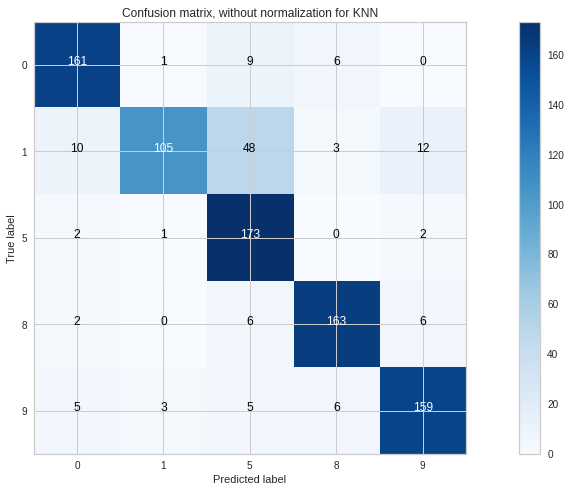

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for KNN")
    else:
        print('Confusion matrix, without normalization for KNN')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,7))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '5', '8', '9'],
                      title='Confusion matrix, without normalization for KNN')

ROC_AUC

Roc_AUC Score:  0.9106955817939439 



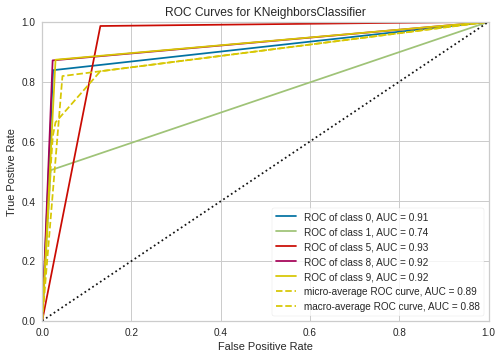

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_knn_prob = knn_model.predict_proba(x_test)
knn = roc_auc_score(y_test, y_pred_knn_prob, multi_class="ovo")
print("Roc_AUC Score: ", knn, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

In [ ]:
results=cross_val_score(knn_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.82 0.88 0.88 0.85 0.84 0.87 0.85 0.88 0.85 0.82] 

Accuracy: 0.85 (0.02)


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dst_model = DecisionTreeClassifier(random_state=1)
dst_model.fit(x_train, y_train)
y_pred_dst = dst_model.predict(x_test)
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       898
         2.0       0.96      1.00      0.98       898
         3.0       0.94      1.00      0.97       898
         4.0       0.81      0.92      0.86       898
         5.0       0.91      0.65      0.76       898

    accuracy                           0.91      4490
   macro avg       0.91      0.91      0.91      4490
weighted avg       0.91      0.91      0.91      4490



In [ ]:
results=cross_val_score(dst_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.88 0.92 0.93 0.91 0.9  0.88 0.91 0.89 0.88 0.91] 

Accuracy: 0.90 (0.02)


# **Comparison**

In [ ]:
"""model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

names = [""]

for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    index+=1"""

'model_cols = []\ndf=pd.DataFrame(columns=model_cols)\nindex=0\n\nnames = [""]\n\nfor name, clf in zip(names, classifiers):\n    clf.fit(x_train,y_train)\n    df.loc[index,\'Classifiers\'] = name\n    df.loc[index,\'Train Accuracy\'] = clf.score(x_train,y_train)\n    df.loc[index,\'Test Accuracy\'] = clf.score(x_test,y_test)\n    df.loc[index,\'Precision\'] = precision_score(y_test,clf.predict(x_test))\n    df.loc[index,\'Recall\'] = recall_score(y_test,clf.predict(x_test))\n    df.loc[index,\'F1 Score\'] = f1_score(y_test,clf.predict(x_test))\n    index+=1'

# **Predictive Model**

In [ ]:
def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = remove_stopword(text)
  text = remove_punc_qut(text)
  text = stemming(text)
  text = tfidf.transform([text])

  return text

text = "Product is not original."
print(text)
txt = preprocessing(text)
predict = svmModel.predict(txt)
if predict[0] == 1:
  print("Positive")
elif predict[0] == 0:
  print("Negative")
elif predict[0] == 8:
  print("Slightly Positive")
elif predict[0] == 9:
  print("Slightly Negative")
elif predict[0] == 5:
  print("Neutral")

Product is not original.
Negative
